In [8]:
import pandas as pd

df = {
    "cooking": pd.read_csv('../dataset/processed/cooking.csv'),
    "crypto": pd.read_csv('../dataset/processed/crypto.csv'),
    "robotics": pd.read_csv('../dataset/processed/robotics.csv'),
    "biology": pd.read_csv('../dataset/processed/biology.csv'),
    "travel": pd.read_csv('../dataset/processed/travel.csv'),
    "diy": pd.read_csv('../dataset/processed/diy.csv'),
    #"physics": pd.read_csv('physics.csv'),
}

from WiSARD import WiSARD
import numpy as np
import pandas as pd
import math
import sys
import random
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Classe verdadeira')
    plt.xlabel('Classe prevista')

In [2]:
data = []
for file in df:
    for i in range(df[file].shape[0]):
        if type(df[file].iloc[i]['title']) is str:
            data.append(df[file].iloc[i]['title'])
        if type(df[file].iloc[i]['content']) is str:
            data.append(df[file].iloc[i]['content'])

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
sv = CountVectorizer(binary=True, max_df=0.025, min_df=0.005)
d = sv.fit(data)

In [22]:
X = []
y = []
for file in df:
    for i in range(2000):
        if type(df[file].iloc[i]['content']) is str:
            X.append(df[file].iloc[i]['content'])
            y.append(file)
            
X_test = []
y_test = []
for file in df:
    for i in range(2001,2501):#range(df[file].shape[0]):
        if type(df[file].iloc[i]['content']) is str:
            X_test.append(df[file].iloc[i]['content'])
            y_test.append(file)

In [23]:
X = sv.transform(X)
X_test = sv.transform(X_test)

In [24]:
X

<11998x832 sparse matrix of type '<class 'numpy.int64'>'
	with 176905 stored elements in Compressed Sparse Row format>

In [25]:
w = WiSARD(8, seed=random.randint(0, 2**32-1), ignore_zero_addr=True)

In [26]:
w.fit(X.toarray(), y)

In [27]:
result = w.predict(X_test.toarray())

Confusion matrix, without normalization
[[374  11  18   9  15  73]
 [  1 451  29   4   3  12]
 [  2  19 409   8  16  46]
 [ 20  49  87 251  31  62]
 [  3   7  23   6 433  28]
 [  4   5  27   7   6 451]]


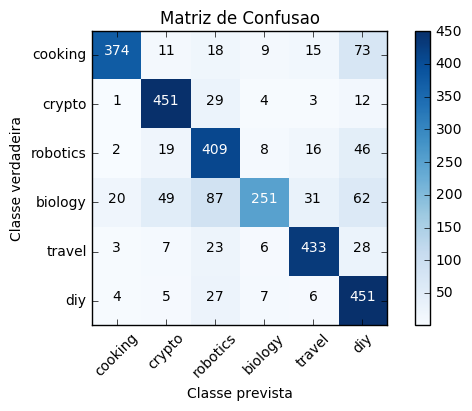

In [28]:
# import confusion matrix function
from sklearn.metrics import confusion_matrix
# Making the Confusion Matrix
cm = confusion_matrix(y_test, result, labels=['cooking', 'crypto', 'robotics', 'biology', 'travel', 'diy'])
#class_names = ['A','B','C','D','E','F','G','H']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=['cooking', 'crypto', 'robotics', 'biology', 'travel', 'diy'], title='Matriz de Confusao')
plt.show()

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, result)

0.7896666666666666

Confusion matrix, without normalization
[[364  14  23   6  11  82]
 [  0 451  31   4   3  11]
 [  1  26 395   7  13  58]
 [ 15  64  90 239  21  71]
 [  2   5  23   4 432  34]
 [  2   6  18   7   6 461]]


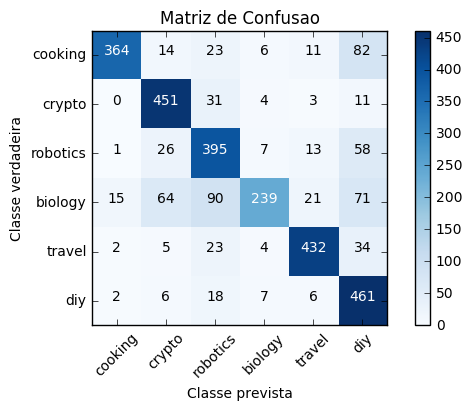

In [31]:
w = WiSARD(2, seed=random.randint(0, 2**32-1), ignore_zero_addr=True)
w.fit(X.toarray(), y)
result = w.predict(X_test.toarray())
# import confusion matrix function
from sklearn.metrics import confusion_matrix
# Making the Confusion Matrix
cm = confusion_matrix(y_test, result, labels=['cooking', 'crypto', 'robotics', 'biology', 'travel', 'diy'])
#class_names = ['A','B','C','D','E','F','G','H']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=['cooking', 'crypto', 'robotics', 'biology', 'travel', 'diy'], title='Matriz de Confusao')
plt.show()

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, result)

0.7806666666666666